In [58]:
import pandas as pd

df = pd.read_csv("salida.txt")
prom = {}
for _, row in df.iterrows():
    if not (row["Tamanio"] in prom.keys()):
        prom[int(row["Tamanio"])] = float(row["Tiempo"])
    else:
        prom[int(row["Tamanio"])] += float(row["Tiempo"])

dfProm = pd.DataFrame(
{"Tamanio" : prom.keys(),
"Tiempo" : prom.values()
}
)
dfProm["Tiempo"] = dfProm["Tiempo"] / (len(df["Tamanio"]/len(dfProm["Tamanio"])))
dfProm

,Tamanio,Tiempo
0,1,0.000023
1,2,0.000021
2,4,0.000021
3,8,0.000022
4,16,0.000022
5,32,0.000022
6,64,0.000022
7,128,0.000022
8,256,0.000022
9,512,0.000022


In [59]:
dfProm["Tamanio(bytes)"] = dfProm["Tamanio"] * 4

In [60]:
print(dfProm.to_latex(index=False))

\begin{tabular}{rrr}
\toprule
   Tamanio &   Tiempo &  Tamanio(bytes) \\
\midrule
         1 & 0.000023 &               4 \\
         2 & 0.000021 &               8 \\
         4 & 0.000021 &              16 \\
         8 & 0.000022 &              32 \\
        16 & 0.000022 &              64 \\
        32 & 0.000022 &             128 \\
        64 & 0.000022 &             256 \\
       128 & 0.000022 &             512 \\
       256 & 0.000022 &            1024 \\
       512 & 0.000022 &            2048 \\
      1024 & 0.000022 &            4096 \\
      2048 & 0.000022 &            8192 \\
      4096 & 0.000022 &           16384 \\
      8192 & 0.000023 &           32768 \\
     16384 & 0.000024 &           65536 \\
     32768 & 0.000027 &          131072 \\
     65536 & 0.000031 &          262144 \\
    131072 & 0.000039 &          524288 \\
    262144 & 0.000054 &         1048576 \\
    524288 & 0.000082 &         2097152 \\
   1048576 & 0.000139 &         4194304 \\
   2097152 & 0.

In [61]:
import matplotlib.pyplot as plt

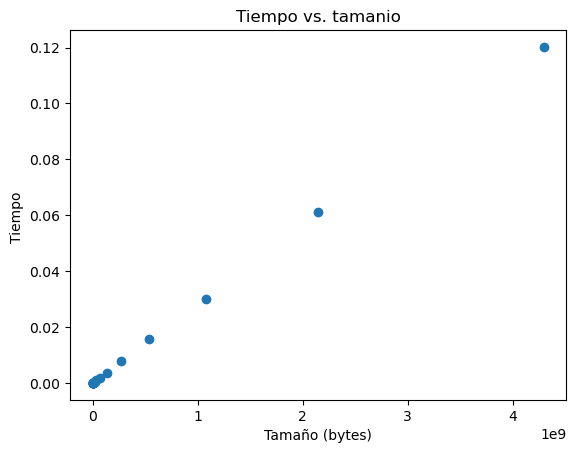

In [62]:
plt.title("Tiempo vs. tamanio")

plt.scatter(dfProm["Tamanio(bytes)"], dfProm["Tiempo"])
plt.xlabel("Tamaño (bytes)")
plt.ylabel("Tiempo (s)")
plt.savefig("salida/scatterej1.png")
plt.show()


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
reg = LinearRegression()

x = dfProm[["Tamanio(bytes)"]]
y = dfProm["Tiempo"]

reg.fit(x, y)

LinearRegression()

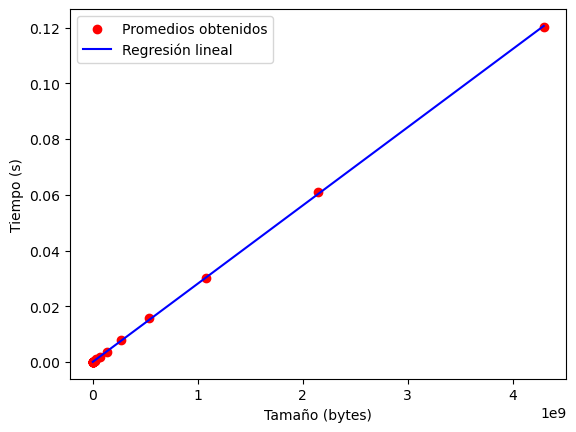

In [65]:
yPred = reg.predict(x)

plt.scatter(x, y, color="red", label="Promedios obtenidos")
plt.plot(x, yPred, color="blue", label="Regresión lineal")
plt.xlabel("Tamaño (bytes)")
plt.ylabel("Tiempo (s)")
plt.legend()
plt.savefig("salida/reglinej1.png")
plt.show()

In [69]:
print("l: ",reg.intercept_, "segundos")
[Out]
l:  5.690697517491978e-05 segundos

l:  5.690697517491978e-05 segundos


In [67]:
xs = x["Tamanio(bytes)"].tolist()

In [68]:
for yp, i in zip(yPred, xs):
    yp -= reg.intercept_
    b = i/yp
    print(b)


35622346467.56683
35622346467.56683
35622346467.02941
35622346467.02941
35622346467.163765
35622346467.163765
35622346467.13018
35622346467.13018
35622346467.13857
35622346467.13438
35622346467.13438
35622346467.13543
35622346467.1349
35622346467.1349
35622346467.1349
35622346467.13497
35622346467.13497
35622346467.13493
35622346467.13495
35622346467.13495
35622346467.13495
35622346467.13495
35622346467.13495
35622346467.13495
35622346467.13495
35622346467.13495
35622346467.13495
35622346467.13494
35622346467.13495
35622346467.13495
35622346467.13495
